In [120]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
df = pd.read_csv('source.csv')

In [126]:
df.set_index('species', inplace=True)

In [127]:
df

,cannelloni,basil,pastry,filling,leafy,quesadillas,goulash,tomatilla,vegetables,peaches,...,crawfish,beet,tomatillo,cactus,meringue,ranch,octopus,lettuce,peas,mango
species,,,,,,,,,,,,,,,,,,,,,
faecalis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
enterica,1,2,1,1,0,1,0,1,6,0,...,2,0,0,0,2,1,0,18,1,7
vibrio,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
giardia,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
shellfish,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
perfringens,0,0,0,0,0,0,2,0,2,0,...,1,2,0,0,0,0,0,5,2,0
clostridium,0,0,0,0,0,0,2,0,2,0,...,1,4,0,0,0,0,0,5,3,0
enteropathogenic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
df_diseases_reduced = df.sum()

In [129]:
df_foods_reduced = df.sum(axis=1)

In [130]:
# top 10 outbreak sources as a percent of total sources; note that these categories are not mutually
# exclusive (outbreaks can have more than one contaminated product, and string processing was
# imperfect), so percentages do not add up to 100

In [131]:
top_foods = df_diseases_reduced.sort_values(ascending=False) / df_diseases_reduced.sum() * 100

In [132]:
top_foods

chicken     9.558717
salad       6.912176
beef        3.977027
ice         2.828364
sandwich    2.444515
              ...   
fudge       0.000000
taro        0.000000
cockles     0.000000
glacial     0.000000
pretzel     0.000000
Length: 859, dtype: float64

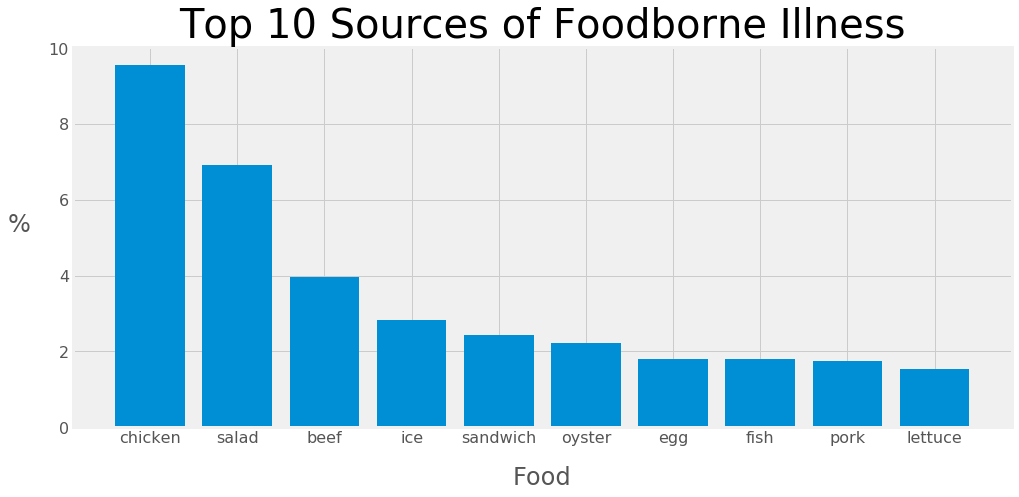

In [133]:
fig,ax = plt.subplots(figsize=(15,7))
ax.bar(top_foods[:10].index,top_foods[:10])
ax.set_xlabel('Food', labelpad = 20, fontsize=24)
ax.set_ylabel('%', fontsize=24, labelpad = 30, rotation=0)
ax.set_title('Top 10 Sources of Foodborne Illness', fontsize=40)
plt.style.use('fivethirtyeight')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout;

In [134]:
# top 10 outbreak etiologies as a percent of total etiologies; note that doubles in the chart,
# which is due to genus and species being separated into separate categories during string
# processing

In [135]:
top_diseases = df_foods_reduced.sort_values(ascending=False) / df_foods_reduced.sum() * 100

In [136]:
top_diseases

species
virus          15.830183
norovirus      15.512713
salmonella     10.043580
enterica        9.916592
clostridium     5.809691
                 ...    
vulnificus      0.005772
glutamate       0.005772
monosodium      0.005772
amnesic         0.002886
anisakis        0.002886
Length: 67, dtype: float64

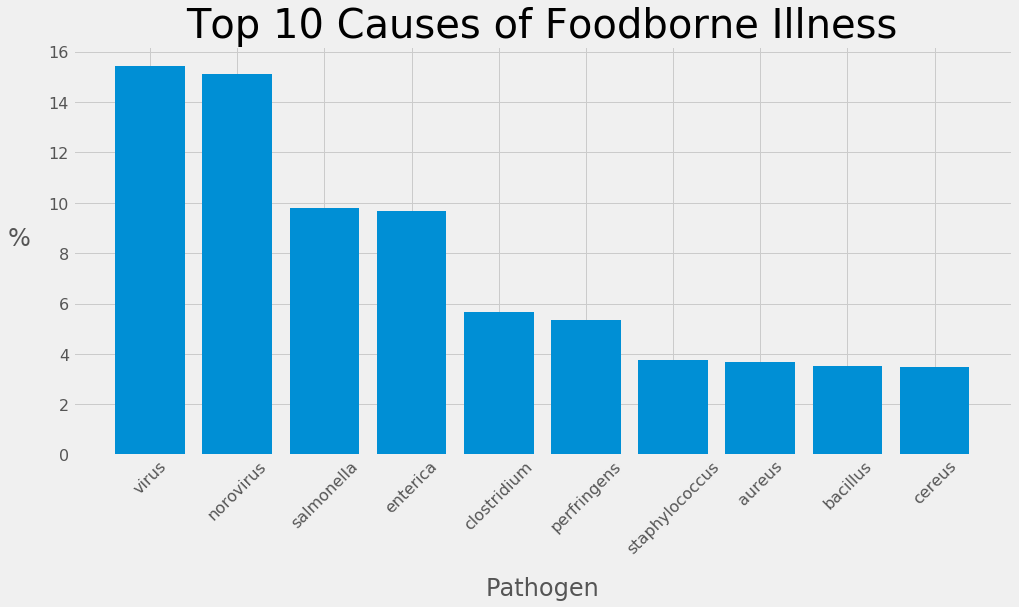

In [137]:
fig,ax = plt.subplots(figsize=(15,7))
ax.bar(top_diseases[:10].index,ten_diseases[:10])
ax.set_xlabel('Pathogen', labelpad = 20, fontsize=24)
ax.set_ylabel('%', fontsize=24, labelpad = 30, rotation=0)
ax.set_title('Top 10 Causes of Foodborne Illness', fontsize=40)
plt.style.use('fivethirtyeight')
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)
plt.tight_layout;

In [138]:
# Again, note the data appears to be paired off

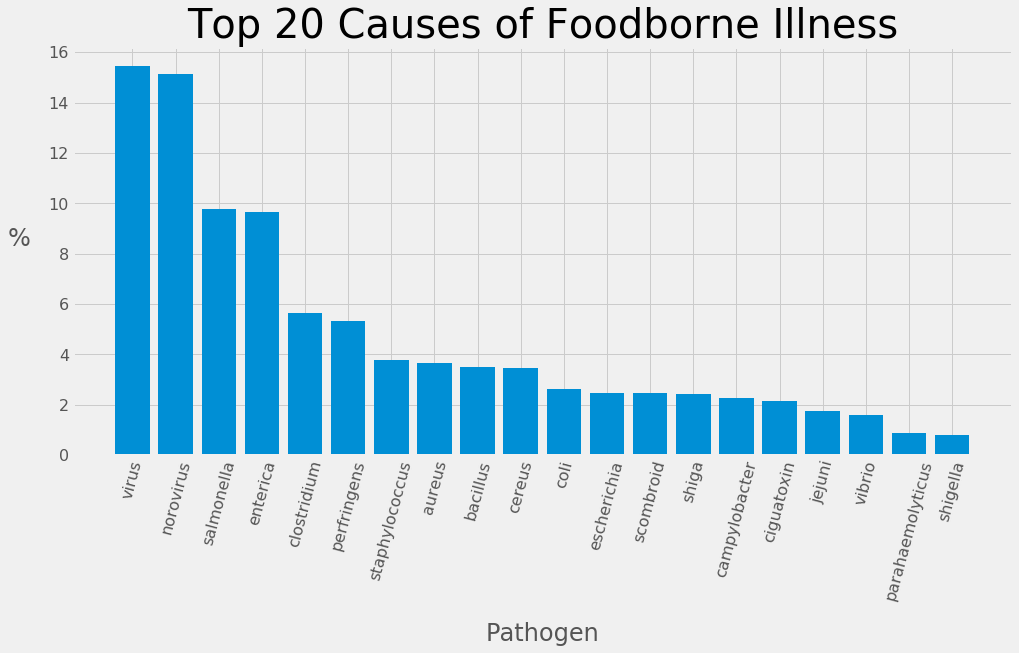

In [139]:
fig,ax = plt.subplots(figsize=(15,7))
ax.bar(top_diseases[:20].index,ten_diseases[:20])
ax.set_xlabel('Pathogen', labelpad = 20, fontsize=24)
ax.set_ylabel('%', fontsize=24, labelpad = 30, rotation=0)
ax.set_title('Top 20 Causes of Foodborne Illness', fontsize=40)
plt.style.use('fivethirtyeight')
plt.xticks(fontsize=16, rotation=75)
plt.yticks(fontsize=16)
plt.tight_layout;

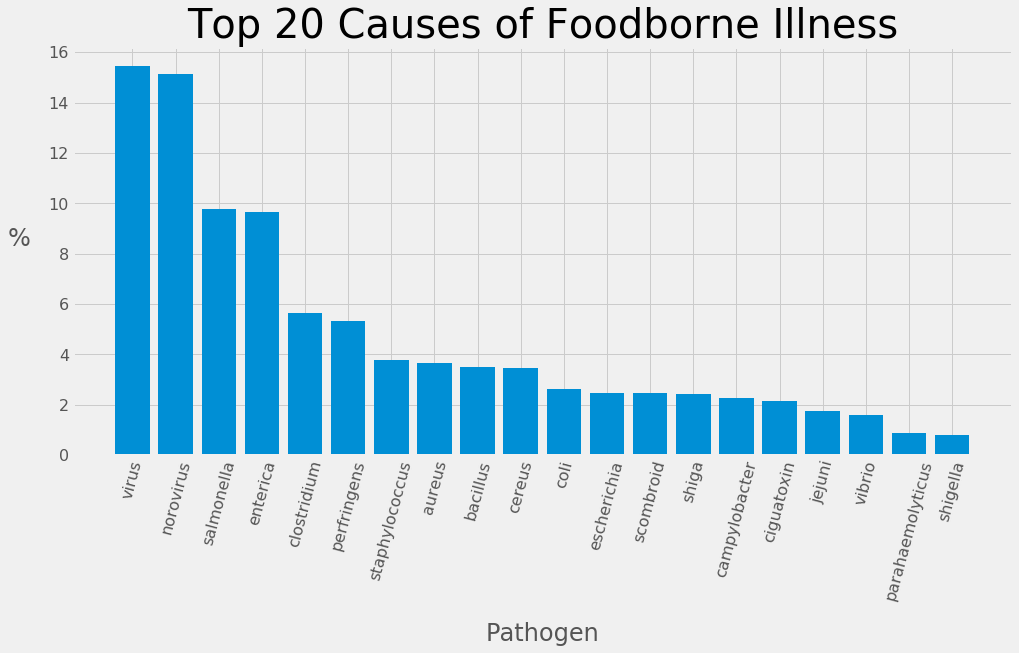

In [140]:
fig,ax = plt.subplots(figsize=(15,7))
ax.bar(top_diseases[:20].index,ten_diseases[:20])
ax.set_xlabel('Pathogen', labelpad = 20, fontsize=24)
ax.set_ylabel('%', fontsize=24, labelpad = 30, rotation=0)
ax.set_title('Top 20 Causes of Foodborne Illness', fontsize=40)
plt.style.use('fivethirtyeight')
plt.xticks(fontsize=16, rotation=75)
plt.yticks(fontsize=16)
plt.tight_layout;

In [141]:
double_top_diseases = top_diseases

In [144]:
double_top_diseases[:20]

species
virus               15.830183
norovirus           15.512713
salmonella          10.043580
enterica             9.916592
clostridium          5.809691
perfringens          5.474905
staphylococcus       3.864469
aureus               3.757684
bacillus             3.604722
cereus               3.570089
coli                 2.698491
escherichia          2.545528
scombroid            2.473376
shiga                2.340616
campylobacter        2.193425
ciguatoxin           1.795146
jejuni               1.639297
vibrio               0.914889
parahaemolyticus     0.802332
shigella             0.528154
dtype: float64